In [10]:
import numpy as np
from matplotlib import pyplot as plt
import random as rd

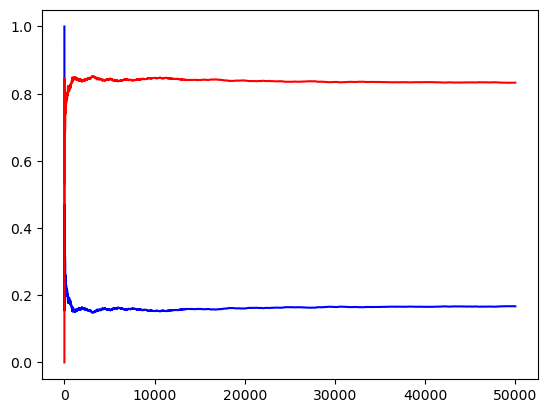

In [ ]:
#SUNNY = 0, CLOUDY = 1
p_sc = 0.1
p_ss = 0.9
p_cs = 0.5
p_cc = 0.5
start = 1
days = np.array(())
c_days = np.array(())
s_days = np.array(())
days = np.append(days, start)
N_burn = 2*(10**4)
N = 5*(10**4)
def next_day (today):
    temp = rd.uniform(0,1)
    if (today == 0): 
        if temp<=p_sc:
            return 1
        else:
            return 0
    if (today == 1):
        if temp<=p_cs:
            return 0
        else:
            return 1
    
c_days = np.append(c_days, np.count_nonzero(days))
s_days = np.append(s_days, 1-np.count_nonzero(days))   
        
#TERMALIZZO IL SISTEMA 
for i in range (1,N):
    days = np.append(days, next_day(days[i-1]))
    c_days = np.append(c_days, np.count_nonzero(days)/(i+1))
    s_days = np.append(s_days, 1-np.count_nonzero(days)/(i+1))

fig1, ax1 = plt.subplots()
ax1.plot(np.arange(N)+1, c_days, color = 'blue')
ax1.plot(np.arange(N)+ 1, s_days, color = 'red')


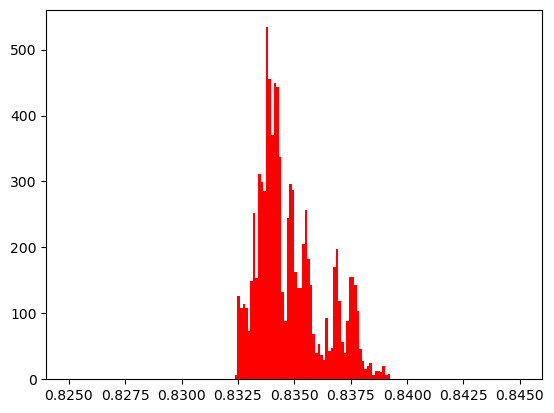

In [ ]:
fig2, ax2 = plt.subplots()
ax2.hist(s_days[N_burn:], density = True, color = 'red', bins = 'auto', range=(0.825, 0.845))
#ax2.hist(c_days[N_burn:], density = True)
plt.show()

In [ ]:
post_sunny = np.sum(s_days[N_burn:])/(N-N_burn)
sunny_var =np.sum(np.square(s_days[N_burn:]-post_sunny))/(N-N_burn-1)
print(post_sunny, (sunny_var**0.5)/(N**0.5))


0.834811344181885 6.517873700259584e-06


(0.825, 0.845)

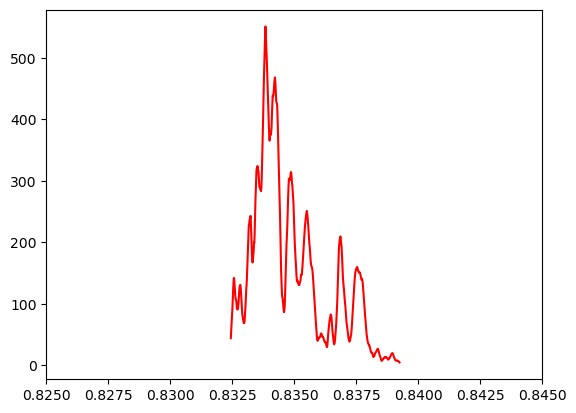

In [ ]:
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(s_days[N_burn:].min(),s_days[N_burn:].max(),1000)

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

PDFtophat = kde_sklearn(s_days[N_burn:],bandwidth=0.00008,kernel="tophat") 
plt.plot(xgrid,PDFtophat, color='red')
plt.xlim(0.825, 0.845) 